# Lernmodul zur Verarbeitung und Analyse von Textdaten

Die Verarbeitung von menschlicher Sprache (Natural Language Processing, NLP) gilt als Voraussetzung für eine erfolgreiche Mensch-Maschine-Kommunikation. Zusätzlich kann sie dabei helfen eine vom Mensch unternommene Textanalyse zu unterstützen. Handelt es sich bei diesem Kommentar um unerwünschte Inhalte, verbreitet dieser Beitrag Falschinformationen und welche Meinung will der Verfasser mit dieser Rezension zum Ausdruck bringen.

Im folgenden Lernmodul sollen mithilfe computergestützter Methoden eine Antwort auf solche Problemstellungen gefunden werden. Im Zuge der Sentiment Analysis wird versucht die Intention hinter einem Textbeitrag zu quantifizieren um bspw. zwischen einer positiven und einer negativen Aussage zu unterscheiden. Bevor aber ein Modell (hier: Klassifikator) eine Vorhersage (hier: Stimmung) über die verfügbaren Daten (hier: Textbeiträge) treffen kann, müssen diese vorbereitet werden. Das folgende Modul spielt diese Vorbereitung einmal mithilfe eines Jupyter Notebook, der Programmiersprache Python und unterstützenden Bibliotheken durch.

**Übersicht über die Lerninhalte:**

1. [Einführung](#einführung)
    1. [Motivation](#motivation)
    2. [Voraussetzungen](#voraussetzungen)
2. [Daten](#daten)
    1. [Textdaten beschaffen](#beschaffen)
    2. [Textdaten erkunden](#erkunden)
    3. [Textdaten aufbereiten](#aufbereiten)
        1. [Zeichen bereinigen](#zeichen-bereinigen)
        2. [Wörter bereinigen](#wörter-bereinigen)
        3. [Tweets bereinigen](#tweets-bereinigen)
3. [Modell](#modell)
    1. [Textdaten einbetten](#einbetten)
        1. [Vokabular](#vokabular)
        2. [Label](#label)
        3. [Vektorisierung](#vectorization)
        4. [Features](#features)
    2. [Textdaten klassifizieren](#klassifizieren)
        1. [Überwachte Klassifikation](#überwachte-klassifikation)
        2. [Unüberwachte Klassifikation](#unüberwachte-klassifikation)
4. [Verwendung](#verwendung)
5. [Abschluss](#abschluss)

**Lernziele:**

Die Teilnehmer lernen Textdaten in roher Form Schritt für Schritt in kontextbezogene Daten für eine Textanalyse zu transformieren. Dies geschieht in der Datendomäne. Daraufhin bewegen sich die Teilnehmer in der Modelldomäne, in der sie die Daten in das Modell einbetten und sie vom Modell klassifizieren lassen.

**Voraussetzungen:**

- [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas)

**Setup für die Aufgabenüberprüfung:**

In [1]:
from taskreview.learningModule import LearningModule
texte_lm = LearningModule('data/lernmodul_texte.db')

<div style="background-color: #150458; padding: 5px;"></div>

## 1. <a id='einführung'>Einführung</a>

### 1.1 <a id='motivation'>Motivation</a>

Die Verarbeitung menschlicher Sprache (Natural Language Processing, NLP) ist ein prominentes Forschungsfeld der Informatik mit ähnlichem Bekanntheitsgrad wie die Analyse visueller Daten (Computer Vision), welche bspw. das Erkennen von Bildern (Image Recognition) sowie ihre Manipulation (Image Augmentation) betrachtet. Im ersten Fall wollen wir einen bekannten bzw. alten Bildinhalt klassifizieren, während der zweite Fall einen unbekannten bzw. neuen Bildinhalt erzeugt.

Wechseln wir von der Bild- auf die Textebene, lässt sich das Forschungsfeld des _NLP_ auf ähnliche Problemstellungen herunterbrechen, die in der folgenden Auflistung aufgeführt sind:

* Texterkennung (Text Recognition)
  * Spracherkennung (Speech Recognition)
  * Stimmungsanalyse (Sentiment Analysis)
* Textmanipulation (Text Augmentation)
  * Maschinelle Übersetzung (Machine Translation)
  * Automatisches Antworten (Question Answering)

Dieses Lernmodul beschäftigt sich mit der ersten Problemstellung, also der Texterkennung, im besonderen mit der Unterscheidung zwischen verschiedenen Stimmungen, welche der Verfasser eines Textes gehabt haben könnte. Ein aktuelles Anwendungsbeispiel ist die Identifikation von Hassreden, wie sie bspw. von [Facebook](https://www.facebook.com/) im Zuge ihrer [Community Standards](https://www.facebook.com/communitystandards/hate_speech) verboten sind und erkannt werden müssen. Aber auch ein aktuelles Stimmungsbild der Gesellschaft kann in Krisenzeiten über kürzlich verfasste Beiträge auf Twitter geschaffen werden.

### 1.2 <a id='voraussetzungen'>Voraussetzungen</a>

Dieses Lernmodul nimmt sich [NumPy](https://numpy.org/) für numerische Berechnungen, [Pandas](https://pandas.pydata.org/) zur Datenverarbeitung und [PyPlot](https://matplotlib.org/api/pyplot_api.html) zur Datenvisualisierung zur Hilfe. Die folgende Zelle importiert benötigte Abhängigkeiten:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div style="background-color: #150458; padding: 5px;"></div>

## 2. <a id='daten'>Daten</a>

In der Datendomäne beschaffen wir uns zunächst einen Datensatz, welcher aus vielen Beispielen besteht, der die Grundgesamtheit an Daten bildet. Ein Beispiel umfasst dabei mindestens ein, wenn nicht sogar mehrere Merkmale. Ein Merkmal wird dabei durch einen numerischen oder symbolischen Wert verkörpert, der in unserem Fall bspw. ein Text sein kann. Im weiteren Verlauf werden die beschafften Daten begutachtet und auf Basis dessen bereinigt.

### 2.1 <a id='beschaffen'>Textdaten beschaffen</a>

Wo findet man in der heutigen Zeit aktuelle Daten, welche eine eigene Meinung enthalten? Auf dem Kurznachrichtendienst Twitter. Und genau von dort stammt das ZIP-Archiv `tweets.json.zip`, welches wir im folgenden mithilfe von Pandas einlesen und im DataFrame `twitter` hinterlegen.

In [3]:
twitter = pd.read_json('./tweets.json.gz', compression='gzip')

### 2.2 <a id='erkunden'>Textdaten erkunden</a>

Wie im [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas) kennengelernt, lässt sich über die `head()` Funktionalität der Kopf des Datensatzes betrachten. Wie schaut dieser aus?

In [4]:
twitter.head()

,twista,type,id,user,created_at,recorded_at,source,retweets,favourites,lang,...,screen_name,location,description,url,verified,followers,friends,listed,statuses,refers_to
0,0.3.1-b,status,1212046141279354880,1.140992e+18,2019-12-31 16:21:33+00:00,2019-12-31 16:21:39.286956+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.3.1-b,status,1212046145645662208,7.137519e+17,2019-12-31 16:21:34+00:00,2019-12-31 16:21:39.657847+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3.1-b,status,1212046145737961472,7.158583e+17,2019-12-31 16:21:34+00:00,2019-12-31 16:21:39.700276+00:00,"<a href=""http://www.facebook.com/twitter"" rel=...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3.1-b,status,1211821086905683968,1.106642e+18,2019-12-31 01:27:16+00:00,2019-12-31 16:21:40.016141+00:00,"<a href=""http://twitter.com/download/iphone"" r...",1582.0,4518,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.3.1-b,status,1212046149990916096,9.990299e+08,2019-12-31 16:21:35+00:00,2019-12-31 16:21:40.711065+00:00,"<a href=""http://twitter.com/download/android"" ...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Leider liefert die `head()` Funktionalität nicht die Größe des Datensatzes zurück. Wie viele Beispiele sind in ihm enthalten?

In [5]:
twitter.shape[0]

50000

50.000 Beispiele sind uns ein paar zu viel. Wir machen mit lediglich 2000 Beispielen weiter.

In [6]:
twitter = twitter[:2000]

Wie viele Werte liegen insgesamt vor?

In [7]:
twitter.size

52000

Wie viele Werte liegen pro Beispiel vor? Aus wie vielen Merkmalen besteht der Datensatz?

In [8]:
twitter.shape[1]

26

26 Merkmale klingt kompliziert. Mal sehen, wie sie heißen...

In [9]:
twitter.columns

Index(['twista', 'type', 'id', 'user', 'created_at', 'recorded_at', 'source',
       'retweets', 'favourites', 'lang', 'hashtags', 'urls', 'mentions',
       'mentioned_ids', 'text', 'name', 'screen_name', 'location',
       'description', 'url', 'verified', 'followers', 'friends', 'listed',
       'statuses', 'refers_to'],
      dtype='object')

Das Merkmal _lang_ schauen wir uns als Erstes an. Welche Sprachen sind vertreten?

In [10]:
twitter['lang'].unique()

array(['de', 'en', 'tr', 'pt', 'es', 'fr', 'ar', 'tl', 'et', 'nl', 'und',
       'in', 'it', 'pl', 'is', 'ko'], dtype=object)

Wir behalten lediglich die deutschen Inhalte...

In [11]:
twitter = twitter.drop(twitter[twitter.lang != 'de'].index).reset_index(drop=True)

Das Merkmal _text_ scheint die gewünschten Tweets zu enthalten. Wir überführen dieses Merkmal vom DataFrame `twitter` in eine DataSeries `tweets`.

In [12]:
tweets = twitter['text']
tweets.head()

0    Hahaha.., da haben "die Nazis" aber Glück 🍀 ge...
1    Ich wünsche allen guten Menschen ein gesundes ...
2    Wir wünschen euch einen guten Rutsch und für d...
3    31.12.2019. Breitscheidplatz. Weihnachtsmarkt....
4    Wir wünschen allen ein friedliches  und sorgen...
Name: text, dtype: object

### 2.3 <a id='aufbereiten'>Textdaten aufbereiten</a>

#### 2.3.1 <a id='zeichen-bereinigen'>Zeichen bereinigen</a>

Schauen wir uns das erste Beispiel an. Was fällt auf?

In [13]:
tweets[0]

'Hahaha.., da haben "die Nazis" aber Glück 🍀 gehabt und was für ein Glück. Hust.. \n\nWelcher Mann bitteschön, würde denn mit "DER".., na Ihr wisst schon..😂😛 https://t.co/a749iauM9U'

Genau, der Tweet enthält allerhand Sonderzeichen, Emojis und sogar eine URL. Daher werden wir als nächstes alle Symbole entfernen, die weder dem Alphabet angehören, noch Ziffern sind. Der zweite reguläre Ausdruck entfernt zusätzlich die URL.

In [14]:
tweets = tweets.replace(regex={'[^a-zA-ZäöüßÄÖU\s]' : '', r'http\S+' : ''})
tweets[0]

'Hahaha da haben die Nazis aber Glück  gehabt und was für ein Glück Hust \n\nWelcher Mann bitteschön würde denn mit DER na Ihr wisst schon '

#### 2.3.2 <a id='wörter-bereinigen'>Wörter bereinigen</a>

Aus Sätzen werden Wörter. Wir zerteilen jeden Tweet anhand des Leerzeichens und erhalten eine Liste von Wörtern pro Tweet.

In [15]:
tweets = tweets.str.split()
tweets.head()
tweets[0]

['Hahaha',
 'da',
 'haben',
 'die',
 'Nazis',
 'aber',
 'Glück',
 'gehabt',
 'und',
 'was',
 'für',
 'ein',
 'Glück',
 'Hust',
 'Welcher',
 'Mann',
 'bitteschön',
 'würde',
 'denn',
 'mit',
 'DER',
 'na',
 'Ihr',
 'wisst',
 'schon']

Nun da wir die einzelnen Wörter getrennt haben, fassen wir alle Wörter aus jedem Tweet zu einer großen Sammlung zusammen.

In [16]:
def aggregate_words(tweets):
    """Aggregate words from tweets"""
    
    all_words = []
    for sentence in tweets:
        for word in sentence:
            all_words.append(word)
    return all_words

In [17]:
all_words = aggregate_words(tweets) # List
# all_words = tweets.aggregate(np.concatenate) # NumPy array

Nachdem wir alle Wörter beisammen haben, interessieren uns die beliebtesten Wörter. An dieser Stelle greifen wir zum ersten mal auf das Natural Language Toolkit ([NLTK](https://www.nltk.org/)) zurück, welches eine Häufigkeitsverteilung über die [FreqDist](http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist) Funktionalität implementiert.

In [18]:
from nltk.probability import FreqDist
fd = FreqDist(all_words)

Wie lauten also die zehn häufigsten Wörter

In [19]:
fd.most_common(10)

[('und', 878),
 ('die', 634),
 ('Jahr', 492),
 ('in', 464),
 ('der', 460),
 ('ich', 376),
 ('das', 344),
 ('für', 312),
 ('ein', 288),
 ('ist', 286)]

Und wie sieht deren Häufigkeitsverteilung aus?

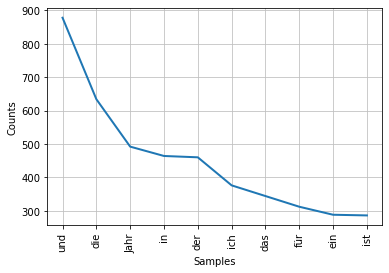

In [20]:
fd.plot(10)

Denken wir an unsere Problemstellung der Stimmungsanalyse scheinen Verbindungswörter wie _und_ bzw. Artikel wie _der_, _die_, _das_ nicht hilfreich zu sein. Daher wollen wir sie als sog. Stopp-Wörter, also Wörter, die den Lesefluss stören, entfernen. Die folgende Liste sollte zu Beginn ausreichen:

In [21]:
stop_words = pd.read_csv('./stop_words.txt', names=['Stoppwort'])
stop_words = stop_words['Stoppwort'].values.tolist()
len(stop_words)

29

Wie viel Prozent unseres Datensatzes würden wir wohl verlieren, wenn wir die Stopp-Wörter entfernen?

In [22]:
def content_loss(text):
    content = [word for word in text if word not in stop_words]
    return 1.0 - len(content) / len(text)

In [23]:
content_loss(all_words)

0.1466811358292639

13 % Verlust klingt verkraftbar. Dann werfen wir den Filter mal an.

In [24]:
def filter_tokens(tweets):
    """Filter tokens in tweets"""
    
    row_list = []
    for row in tweets:
        token_list = []
        for token in row:
            if token not in stop_words:
                token_list.append(token)
        row_list.append(token_list)
    
    return pd.Series(row_list)

In [25]:
tweets = filter_tokens(tweets) # Python list

Damit muss unsere Sammlung von Wörtern aktualisiert werden. Der Einfachheit sammeln wir sie erneut aus den von Stopp-Wörtern bereinigten Tweets.

In [26]:
all_words = aggregate_words(tweets) # List
# all_words = tweets.aggregate(np.concatenate) # NumPy array

Rufen wir die Verlustfunktion erneut auf, meldet sie wie erwartet keine Verluste.

In [27]:
content_loss(all_words)

0.0

Wie sehen jetzt die häufigsten Wörter aus? Alternativ zur Häufigkeitsverteilung lassen sich Schlagwortwolken aus den Wörtern erstellen. Dazu nutzen wir die Funktionalität von [WordCloud](http://amueller.github.io/word_cloud/index.html).

In [28]:
from wordcloud import WordCloud
wc = WordCloud()

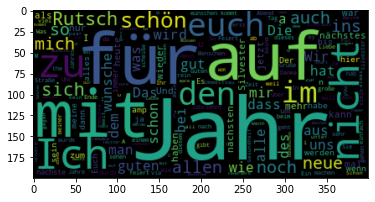

In [29]:
plt.imshow(wc.generate_from_frequencies(FreqDist(all_words)), interpolation="bilinear")
plt.show()

#### 2.3.3 <a id='tweets-bereinigen'>Tweets bereinigen</a>

Nun wollen wir nicht nur einzelne Wörter, sondern sogar ganze Tweets entfernen. Dies ist nötig, wenn sie bspw. zu wenig oder zu viele Wörter für eine Analyse enthalten. Daher interessiert uns im folgenden die Länge eines Tweets. Wie viele Wörter besitzt der kürzeste Tweet?

In [30]:
tweets_length = [len(tweet) for tweet in tweets]
np.min(tweets_length)

1

Hoffentlich handelt es sich um einen Ausreißer. Wir benötigen wiederum eine Häufigkeitsverteilung. Dieses Mal aber als einfaches Histogramm wie folgt:

In [31]:
def plot_tweet_length_distribution(tweets_length):
    """Count tokens per tweet and plot their length distribution."""

    plt.hist(tweets_length, np.max(tweets_length))
    plt.xlabel('Words per tweet')
    plt.ylabel('Amount of tweets')
    plt.title('Tweet length distribution')
    plt.show()

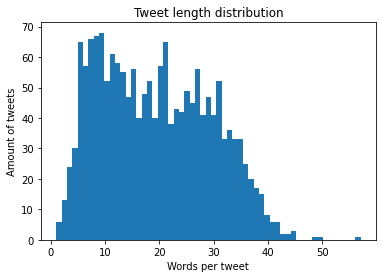

In [32]:
plot_tweet_length_distribution(tweets_length)

Wir verwerfen alle Tweets, die weniger als 8 Wörter besitzen.

In [33]:
def drop_tweets(tweets):
    """Drop tweets"""
    
    row_list = []
    for row in tweets:
        if len(row) > 7:
            row_list.append(row)
    
    return pd.Series(row_list)

In [34]:
tweets = drop_tweets(tweets) # Python list
# tweets = tweets[tweets.map(len) > 7 ] # Pandas
tweets.size

1462

Von den ursprünglich 100 Tweets sind nach unserer Datenaufbereitung lediglich 66 übrig geblieben. Ein guter Zeitpunkt um zur Modelldomäne überzugehen und etwas mit den bereinigten Daten anzustellen.

## 3. <a id='modell'>Modell</a>

In der Modelldomäne betten wir die bereinigten Daten zunächst auf Basis eines Vokabulars in ein Modell ein. Das Vokabular dient dabei als Look-up (LUT) für einen Tweet.

['negativ', 'positiv']

In [35]:
labels = ['negativ', 'positiv']

#### 3.1.1 <a id='vokabular'>Vokabular</a>

Das Vokabular besteht aus negativ bzw. positiv konnotierten Wörtern der deutschen Sprache. Die Schwere der Stimmung ist im Intervall von `[-1, 1]` bzw. `['negativ', 'positiv']` festgelegt, wonach neutrale Wörter, wie _und_ bzw. _oder_ mit eine Stimmungswert von _0_ gleichzusetzen sind.

Dann schauen wir uns mal die negativen...

In [36]:
negative = pd.read_csv('./negative.txt', lineterminator='\n', sep='\t', header=0, names=['Wort', 'Wert', 'Deklination'])
negative['Stimmung'] = 'negativ'
negative.head()

,Wort,Wert,Deklination,Stimmung
0,Abbruch|NN,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",negativ
1,Abdankung|NN,-0.0048,Abdankungen,negativ
2,Abdämpfung|NN,-0.0048,Abdämpfungen,negativ
3,Abfall|NN,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen",negativ
4,Abfuhr|NN,-0.3367,Abfuhren,negativ


...und die positiven Wörter an:

In [37]:
positive = pd.read_csv('./positive.txt', lineterminator='\n', sep='\t', header=0, names=['Wort', 'Wert', 'Deklination'])
positive['Stimmung'] = 'positiv'
positive.head()

,Wort,Wert,Deklination,Stimmung
0,Abschluß|NN,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",positiv
1,Abstimmung|NN,0.004,Abstimmungen,positiv
2,Agilität|NN,0.004,NaN,positiv
3,Aktivität|NN,0.004,Aktivitäten,positiv
4,Aktualisierung|NN,0.004,Aktualisierungen,positiv


Die Spalte _Wort_ scheint den Typ des Wortes angehängt zu haben. Wir führen das negative und das positive Vokabular im DataFrame `vocab` zusammen und trennen das Wort vom Worttyp.

In [38]:
vocab = pd.concat([negative, positive]) # assert positive.size + negative.size == vocab.size
vocab[['Wort', 'Typ']] = vocab['Wort'].str.split('|', 1, expand=True)
vocab.head()

,Wort,Wert,Deklination,Stimmung,Typ
0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",negativ,NN
1,Abdankung,-0.0048,Abdankungen,negativ,NN
2,Abdämpfung,-0.0048,Abdämpfungen,negativ,NN
3,Abfall,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen",negativ,NN
4,Abfuhr,-0.3367,Abfuhren,negativ,NN


Kurze Datenanalyse wie neutral unser Vokabular ist.

In [39]:
vocab.describe()

,Wert
count,3466.000000
mean,-0.053921
std,0.204107
min,-1.000000
25%,-0.043075
50%,-0.004800
75%,0.004000
max,1.000000


Kurze Datenanalyse ob Werte fehlen. 

In [40]:
vocab.isna().values.sum()

807

Fehlende Werte werden mit einer leeren Zeichenkette ersetzt.

In [41]:
vocab = vocab.fillna('')

Für eine unkomplizierte LUT benötigen wir ein Wort pro Zeile. Dies erreichen wir, indem wir die Elemente der Liste in Spalte _Deklinaton_ in eine eigene Reihe überführen.

In [42]:
vocab['Merged'] = vocab['Wort'] + ',' + vocab['Deklination']
vocab['Merged'] = vocab['Merged'].str.split(',')
vocab = vocab.explode('Merged')
vocab = vocab.sort_values('Wort').reset_index(drop=True)
vocab = vocab.rename(columns={'Wort': 'Stamm', 'Merged': 'Wort'})
vocab = vocab.drop(['Deklination'], axis=1)
vocab

,Stamm,Wert,Stimmung,Typ,Wort
0,Abbruch,-0.0048,negativ,NN,Abbruch
1,Abbruch,-0.0048,negativ,NN,Abbruches
2,Abbruch,-0.0048,negativ,NN,Abbrüche
3,Abbruch,-0.0048,negativ,NN,Abbruchs
4,Abbruch,-0.0048,negativ,NN,Abbrüchen
...,...,...,...,...,...
32076,üppig,0.2010,positiv,ADJX,üppigster
32077,üppig,0.2010,positiv,ADJX,üppiges
32078,üppig,0.2010,positiv,ADJX,üppig
32079,üppig,0.2010,positiv,ADJX,üppigsten


Welche Wort-Typen sind vorhanden?

In [43]:
vocab.groupby('Typ').count()

,Stamm,Wert,Stimmung,Wort
Typ,,,,
ADJX,22960,22960,22960,22960
ADV,37,37,37,37
NN,3182,3182,3182,3182
VVINF,5902,5902,5902,5902


Finde das Adjektiv _gut_ im Vokabular.

In [44]:
vocab.loc[vocab['Wort'] == 'gut']

,Stamm,Wert,Stimmung,Typ,Wort
13862,gut,0.3716,positiv,ADJX,gut


Finde die drei schlechtesten Wörter im Vokabular.

In [45]:
vocab.sort_values('Wert').head(3)

,Stamm,Wert,Stimmung,Typ,Wort
1096,Gefahr,-1.0000,negativ,NN,Gefahr
1097,Gefahr,-1.0000,negativ,NN,Gefahren
2219,Schuld,-0.9686,negativ,NN,Schulden


#### 3.1.2 <a id='label'>Label</a>

Dieser Schritt fügt den Tweets eine Stimmung auf Basis des Vokabulars hinzu. Dabei summieren wir die jeweiligen Stimmungswerte aller im Tweet enthaltenen Wörter und schauen ob sie in Summe negativ oder positiv sind.

In [46]:
def get_labels(tweet):
    """Label tweets according to vocabulary."""
    
    score = 0.0
    for token in tweet:
        row = vocab.loc[vocab['Wort'] == token]
        if len(row) == 1:
            score += row['Wert'].to_numpy()
            
    if score > 0.0:
        return 'positiv'
    elif score < 0.0:
        return 'negativ'
    else:
        return 'neutral'

In [47]:
tweets = tweets.to_frame(name='Token')
tweets['Label'] = tweets['Token'].apply(get_labels)
tweets.head()

,Token,Label
0,"[Hahaha, da, haben, Nazis, Glück, gehabt, was,...",positiv
1,"[Ich, wünsche, allen, guten, Menschen, gesunde...",positiv
2,"[Wir, wünschen, euch, guten, Rutsch, für, neue...",positiv
3,"[Breitscheidplatz, Weihnachtsmarkt, Aus, den, ...",negativ
4,"[Wir, wünschen, allen, friedliches, sorgenfrei...",positiv


Neutrale Tweets werden verworfen.

In [48]:
tweets = tweets.drop(tweets[tweets['Label'] == 'neutral'].index).reset_index(drop=True)

Wie sieht die Verteilung zwischen negativen und positiven Tweets aus?

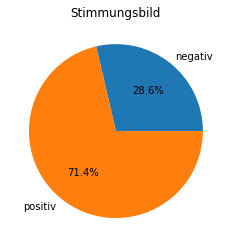

In [49]:
plt.pie([tweets['Label'][tweets['Label'] == 'negativ'].count(), tweets['Label'][tweets['Label'] == 'positiv'].count()], labels=labels, autopct='%1.1f%%')
plt.title('Stimmungsbild')
plt.show()

#### 3.1.3 <a id='vectorization'>Vektorisierung</a>

Innerhalb der Vektorisierung überführen wir die symbolischen Textdaten in numerische Werte. Dies geschieht im Normalfall über Häufigkeitsverteilungen. Je öfter ein Wort im Text vorkommt, desto wichtiger scheint es zu sein, was sich in der Vektorisierung wiederspiegelt.

In diesem Fall aber benutzen wir das bekannte Vokabular und überführen jedes einzelne Wort eines Tweets in seinen Stimmungswert. Das Wort _gut_ kriegt dabei den Stimmungswert 0.3716 zugewiesen, wie die folgende Zelle verdeutlicht.

In [50]:
vocab.loc[vocab['Wort'] == 'gut'].Wert

13862    0.3716
Name: Wert, dtype: float64

In [51]:
def vectorize(tweet):
    """Vectorize tweets based on vocabulary"""
            
    vectors = []
    for token in tweet:          
        row = vocab.loc[vocab['Wort'] == token]
        if len(row) == 1:
            vectors.append(row['Wert'].to_numpy()[0])

    return vectors

In [52]:
tweets['Vector'] = tweets['Token'].apply(vectorize)

Natürlich werden nicht immer gleich viele Wörter im Vokabular gefunden. Wir entscheiden wir uns für die ersten _8_ gefundenen Wörter im Tweet und füllen Tweets mit weniger als _8_ gefundenen Wörtern wie folgt auf.

In [53]:
def padding(tweet, pad_size=8):
    """Pad vectors with zeros at the end."""
    
    pad_size = 8
       
    return np.pad(tweet[:pad_size], (0, pad_size-len(tweet[:pad_size])))

In [54]:
tweets['Vector'] = tweets['Vector'].apply(padding)

#### 3.1.4 <a id='features'>Features</a>

In [55]:
def word_feats(words):
    return dict([(word, True) for word in words])

In [56]:
negative_features = [(word_feats(vocab.loc[vocab['Stimmung'] == 'negativ']['Wort']), 'negativ')]
positive_features = [(word_feats(vocab.loc[vocab['Stimmung'] == 'positiv']['Wort']), 'positiv')]
train_set = negative_features + positive_features

### 3.2 <a id='klassifizieren'>Textdaten klassifizieren</a>

#### 3.2.1 <a id='überwachte-klassifikation'>Überwachte Klassifizierung</a>

Mithilfe des [Naive Bayes](https://www.nltk.org/_modules/nltk/classify/naivebayes.html) Algorithmus führen wir eine überwachte Klassifizierung aus.

In [57]:
from nltk import NaiveBayesClassifier

In [58]:
classifier = NaiveBayesClassifier.train(train_set)

In [59]:
def supervised_classifier(tweets):
    """Supervised classifier"""
    
    print('#\tSoll\tIst\t∆\tTweet')
    
    row = 0
    negative = 0
    positive = 0
    error = 0
    for tweet in tweets.itertuples():
        
        label = tweet.Label
        features = word_feats(tweet.Token)
        prediction = classifier.classify(features)
            
        if label != prediction: 
            delta = 'X'
            error += 1
        else: 
            delta = ' '
        
        if prediction == 'negativ':
            negative += 1
            
        else:
            positive += 1
        
        row += 1
        
        if row % 10 == 0:
            print('%i\t%s\t%s\t%s\t%.160s' % (tweet.Index, label, prediction, delta, ' '.join(tweet.Token)))
        
    print('\nGenauigkeit:', 1 - error / row)
    plt.pie([negative, positive], labels=labels, autopct='%1.1f%%')
    plt.title('Überwachte Klassifizierung')

#	Soll	Ist	∆	Tweet
1063	positiv	positiv	 	polizeiberlin Irgendwie hoffe immer noch dass Silvesternacht etwas friedlich verläuft Guten Rutsch hoffentlich ohne große Vorfälle
193	positiv	positiv	 	Wir wünschen allen Hörern guten Rutsch ins neue Jahr Danke für Unterstützung Wir hoffen seit auch wieder Start nämlich schon on
798	positiv	positiv	 	Ein unglaublich spannendes amp intensives Jahr geht zu Ende Seit Monaten Vizebürgermeisterin amp mir jeden Tag aufs Neue große Freude für Menschen hier Wien zu 
699	positiv	positiv	 	Wünsche Ihnen gutes neues Jahr viel Gesundheit Freude Glück Erfolg Die goldenen iger Jahre beginnen alles alte was war schließen ab nehmen wie Seien offen für a
970	positiv	positiv	 	ja man werft den Böller bitte nochmal meine Nähe wär nett noch zu sterben danke
195	negativ	positiv	X	Am Ende war natürlich noch komplett nüchtern Ein Vlog zur DartsWM darts dartswm
1017	positiv	positiv	 	MyMangaYear Jahres TOP Secret XXX Given Zocker Haikyu Love Stage Hhm diese Favoriten

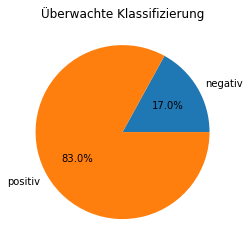

In [60]:
supervised_classifier(tweets.sample(100))

#### 3.2.2 <a id='unüberwachte-klassifikation'>Unüberwachte Klassifizierung</a>

Mithilfe von [K-means](https://www.nltk.org/_modules/nltk/cluster/kmeans.html) Clustering führen wir eine unüberwachte Klassifizierung aus.

In [61]:
from nltk.cluster import KMeansClusterer, euclidean_distance

In [62]:
clusterer = KMeansClusterer(2, euclidean_distance, repeats=10)

In [64]:
clusters = clusterer.cluster(tweets['Vector'], True)

Wo liegen die Mittelpunkte unserer Cluster?

In [65]:
def plot_clusters():
    """Plot clusters"""
    
    means = clusterer.means()
    plt.scatter(means[0], means[0])
    plt.scatter(means[1], means[1])
    plt.legend(['Negativ', 'Positiv'])

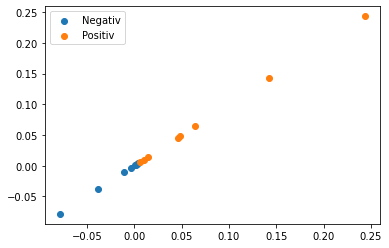

In [66]:
plot_clusters()

In [67]:
def unsupervised_classifier(tweets):
    """Unsupervised classifier"""
    
    print('#\tSoll\tIst\t∆\tTweet')
    
    row = 0
    negative = 0
    positive = 0
    error = 0
    for tweet in tweets.itertuples():
        
        label = tweet.Label
        vector = tweet.Vector
        prediction = clusterer.classify(vector)
        
        if prediction == 0: 
            cluster = 'negativ'
            negative += 1
            
        else:
            cluster = 'positiv'
            positive += 1
            
        if label != cluster: 
            delta = 'X'
            error += 1
        else: delta = ' '
        
        row += 1
        
        if row % 10 == 0:
            print('%i\t%s\t%s\t%s\t%.160s' % (tweet.Index, label, cluster, delta, ' '.join(tweet.Token)))
   
    print('\nGenauigkeit:', 1 - error / row)
    plt.pie([negative, positive], labels=['negativ', 'positiv'], autopct='%1.1f%%')
    plt.title('Unüberwachte Klassifizierung')

#	Soll	Ist	∆	Tweet
344	negativ	negativ	 	Große Haie kleine Fische für ihn waren alle gleich Mit viel Herz hat im Fernsehen auf Bühne immer wieder Hamburg verkörpert allem im Großstadtrevier Rau trotzde
867	positiv	negativ	X	Böllerst gerne User haben abgestimmt Teilen Sie Ihre Meinung kann sich den Ökomüll sonst wo hinstecken
308	positiv	positiv	 	So dann auch mal mir Ich wünsche euch guten Rutsch ins Jahr feiert schön Und wenn einem dunklen Tunnel steht kein Ausweg glaubt zu finden Ich kann den Weg nicht
218	negativ	negativ	 	Wir hauen nächste Zeit jetzt ab zu für Euch n paar Pix unseren alten Tumblrs raus hier Teil hope you like them mit barevarian Novum Ich dreimal als Top
340	negativ	negativ	 	Ammenmärchen MSM Altparteien vom rauheren Klima im Bundestag durch AfD widerlegt GRNE wüteten ihrer Legislatur extrem Von gab Ordnungsrufe Rügen nur Ordnungsruf
382	positiv	positiv	 	Was haltet davon wenn Oma durch Migrant ersetzen Umwelt durch Asyl Und dann lassen Kinder nochmal singen Mal se

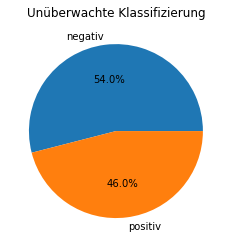

In [68]:
unsupervised_classifier(tweets.sample(100))

<div style="background-color: #150458; padding: 5px;"></div>

## 4. <a id='verwendung'>Verwendung</a>

Welche Stimmung gibt er für folgenden Satz aus?

> Was für ein schlechtes Lernmodul

In [69]:
classifier.classify(word_feats("Was für ein schlechtes Lernmodul".split()))

'negativ'

Welche Stimmung gibt er für folgenden Satz aus?

> Was für ein gutes Lernmodul

In [70]:
classifier.classify(word_feats("Was für ein gutes Lernmodul".split()))

'positiv'

<div style="background-color: #150458; padding: 5px;"></div>

## 5. <a id='abschluss'>Abschluss</a>